# 1. import libraries and dataset 


In [28]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# import dataset
fpath = r'C:\Users\Mei\Medical insurance'

In [3]:
df = pd.read_pickle(os.path.join(fpath,'cleaned data','insurance_clean.pkl'))

In [4]:
df.head()

,age,sex,body_mass_index,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

# 2. Analysis

<AxesSubplot:xlabel='body_mass_index', ylabel='charges'>

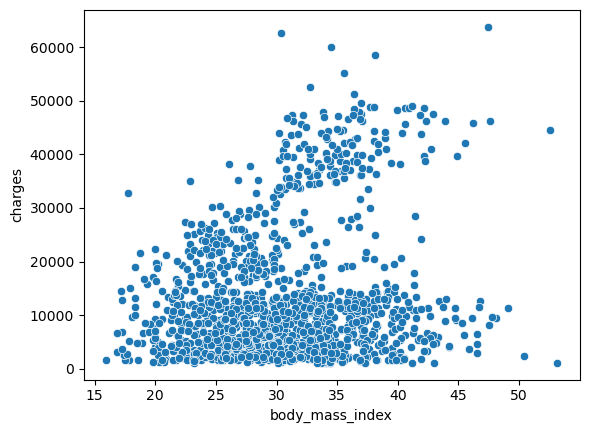

In [6]:
sns.scatterplot(x = 'body_mass_index', y = 'charges', data = df)

<AxesSubplot:ylabel='Frequency'>

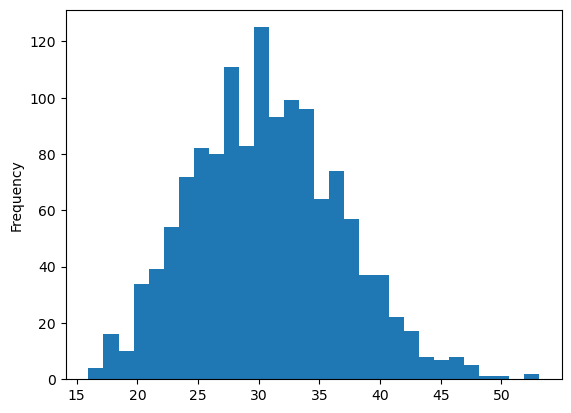

In [7]:
df['body_mass_index'].plot.hist(bins = 30)

<AxesSubplot:ylabel='Frequency'>

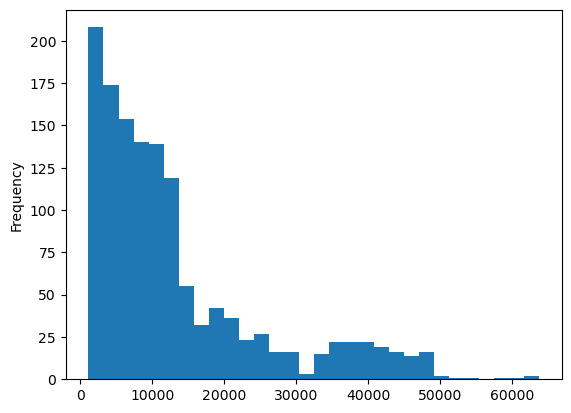

In [8]:
df['charges'].plot.hist(bins = 30)

In [9]:
df_select = df[df['charges']<= 30000]

<AxesSubplot:xlabel='body_mass_index', ylabel='charges'>

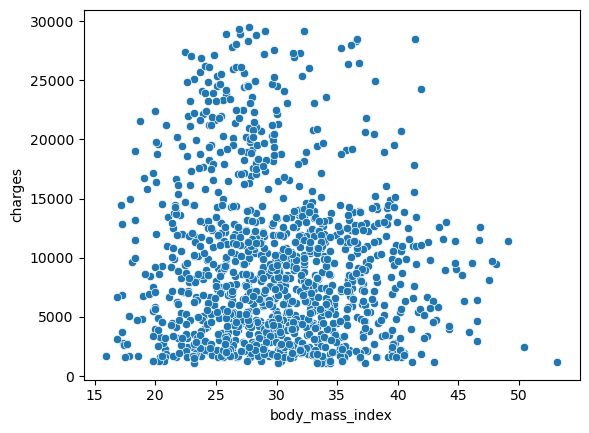

In [10]:
sns.scatterplot(x = 'body_mass_index', y = 'charges', data = df_select)

<AxesSubplot:xlabel='age', ylabel='charges'>

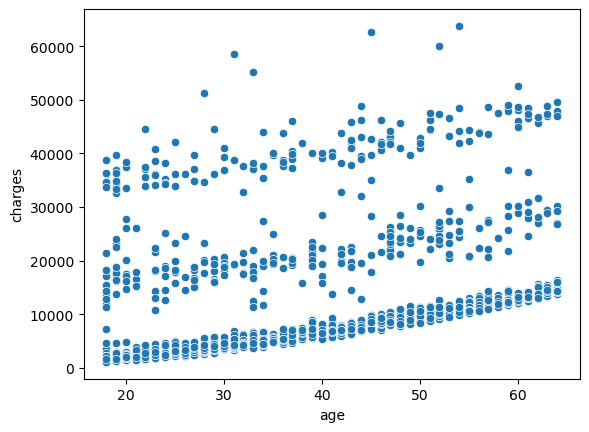

In [11]:
sns.scatterplot(x = 'age', y = 'charges',data = df)

<AxesSubplot:xlabel='age', ylabel='charges'>

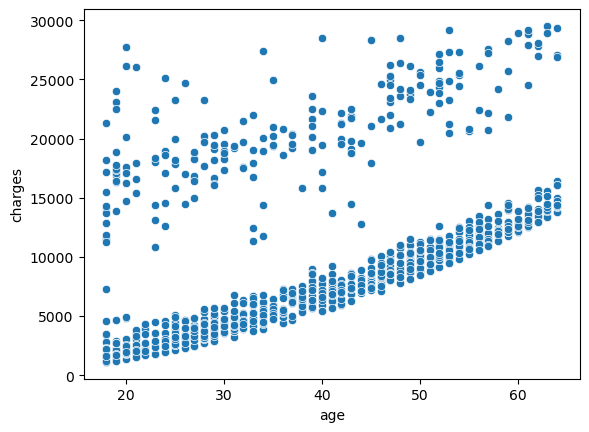

In [12]:
sns.scatterplot(x = 'age', y = 'charges', data = df_select)

In [13]:
df.corr()

,age,body_mass_index,children,charges
age,1.000000,0.109272,0.042469,0.299008
body_mass_index,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Conclusion: Though age and chargesdoes't have a strong correlation, but when the data is devided into different clusters, an outstanding correlation can be senn in every single cluster. 

# 3. Hypothesis and analysis

## 3.1 Hypothesis on age and charges

    - the older a person is, the more insurance charge he pays

## 3.2 Supervised maching learning 

In [14]:
X = df['age'].values.reshape(-1,1)
Y = df['charges'].values.reshape(-1,1)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0 )

### Regression analysis

In [16]:
regression_ins = LinearRegression()

In [17]:
regression_ins.fit(X_train, Y_train)

LinearRegression()

In [19]:
y_predicted = regression_ins.predict(X_test)

In [68]:
yy = [Y_test, y_predicted]

In [70]:
df_yy = pd.DataFrame({'actual':Y_test.flatten(), 'predicted': y_predicted.flatten()})

In [71]:
df_yy.head()

,actual,predicted
0,9724.53000,16200.715762
1,8547.69130,15016.329244
2,45702.02235,15253.206547
3,12950.07120,18332.611494
4,9644.25250,15963.838458


### rmse and r2 score

In [31]:
# rmse
rmse = mean_squared_error(y_true=Y_test, y_pred=y_predicted, squared=False)

In [32]:
# r2 score
r2 = r2_score(Y_test, y_predicted)

In [33]:
print('Slope:', regression_ins.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[236.87730363]]
Mean squared error: 11908.685082762033
R2 score: 0.1106963310942739


### Conclusions: 
    1)There is no significant linear relationship between age and charges
    2)However, one can observe that there exist linear relationship between these two variables when we study them in different ranges of the 'charges' 

# 4. Regression analysis for different category 

In [37]:
df.loc[df['charges']<=14000, 'charge_level'] = 'low_level'
df.loc[(df['charges'] > 14000) & (df['charges'] <= 30000), 'charge_level'] ='mid_level'
df.loc[df['charges'] > 30000, 'charge_level'] = 'high_level'

In [38]:
df['charge_level'].value_counts()

low_level     948
mid_level     228
high_level    162
Name: charge_level, dtype: int64

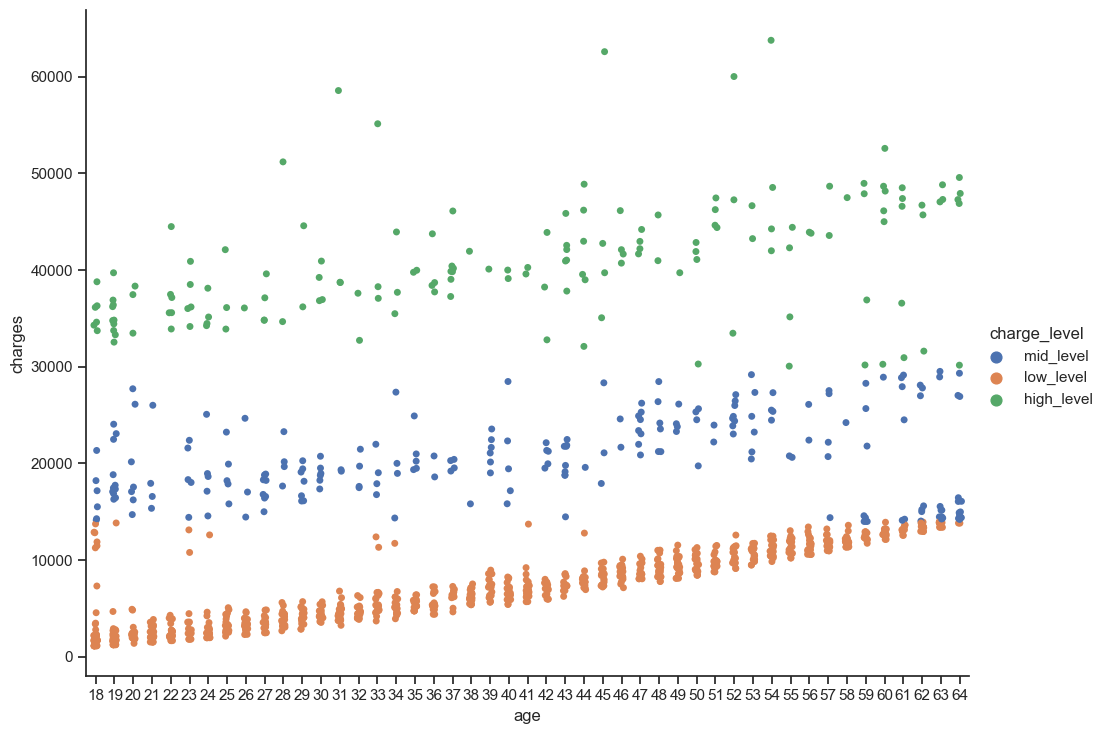

In [51]:
sns.set(style = 'ticks')
g= sns.catplot(x = 'age', y ='charges',hue = 'charge_level', height=7.5, aspect=10/7.5, data = df )

## 4.1 'low-level' charge rang -  regression analysis

In [52]:
df_low = df[df['charge_level'] == 'low_level']

In [53]:
df_low.shape

(948, 8)

In [54]:
reg_low = LinearRegression()

In [56]:
X_low = df_low['age'].values.reshape(-1,1)
Y_low = df_low['charges'].values.reshape(-1,1)

In [57]:
x_low_train, x_low_test, y_low_train, y_low_test = train_test_split(X_low, Y_low, test_size = 0.3, random_state =0)

In [58]:
reg_low.fit(x_low_train, y_low_train)

LinearRegression()

In [59]:
y_low_predicted = reg_low.predict(x_low_test)

In [64]:
# rmse and r2 score
rmse = mean_squared_error(y_true=y_low_test, y_pred=y_low_predicted, squared=False)
r2 = r2_score(y_low_test, y_low_predicted)

In [65]:
print('Slope:', regression_ins.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[236.87730363]]
Mean squared error: 1548.1021836108519
R2 score: 0.8275015048640179


### Conclusions:
    1) for the low_level range, 'age' and 'charges' are strongly linearly correlated.The correlation is positive. 
    2) for the other ranges of 'mid_level' and 'high_level', a same result will be gained. 

In [72]:
df.to_pickle(os.path.join(fpath,'cleaned data','insurance_clean_1.pkl'))